In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\bajpa\Downloads\PAN+Card+Validation+in+PYTHON+-+Scripts\top-5000-youtube-channels.csv")
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [3]:
df.shape

(5000, 6)

In [4]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [5]:
df.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [7]:
df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
pd.options.display.float_format = '{:.2f}'.format

In [10]:
df.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


In [11]:
df = df.replace('--',np.nan,regex=True)

In [12]:
df

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


In [13]:
df.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [14]:
per_missing = df.isnull().sum() * 100 / len(df)

In [15]:
per_missing


Rank            0.00
Grade           0.00
Channel name    0.00
Video Uploads   0.12
Subscribers     7.74
Video views     0.00
dtype: float64

<Axes: >

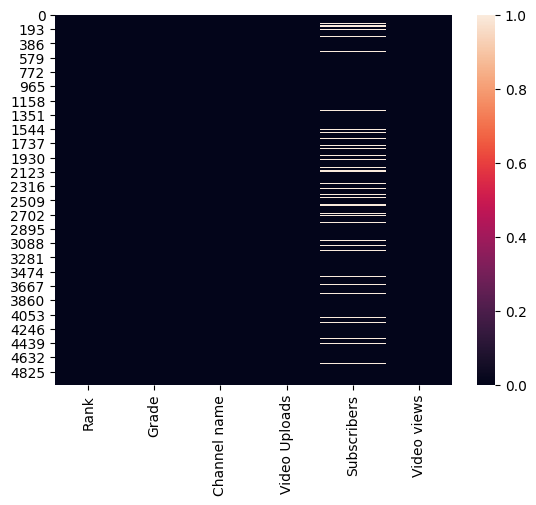

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.dropna(axis=0,inplace=True)

<Axes: >

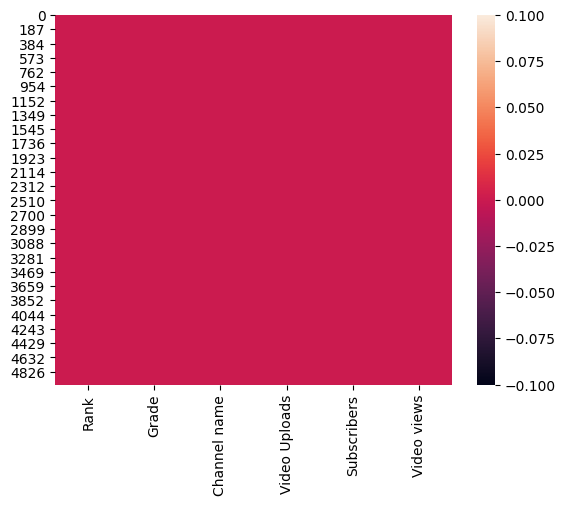

In [18]:
sns.heatmap(df.isnull())

In [19]:
df['Rank'] = df['Rank'].str[0:-2]

In [20]:
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998",B+,Mastersaint,110,3265735,311758426
4998,"4,999",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000",B+,SehatAQUA,254,21172,73312511


In [21]:
df['Rank'] = df['Rank'].str.replace(',','').astype('int')

In [22]:
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,4996,B+,Uras Benlioğlu,706,2072942,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,4998,B+,Mastersaint,110,3265735,311758426
4998,4999,B+,Bruce McIntosh,3475,32990,14563764
4999,5000,B+,SehatAQUA,254,21172,73312511


In [23]:
df.dtypes

Rank              int32
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [24]:
df['Video Uploads'] = df['Video Uploads'].astype('int')

In [25]:
df['Subscribers'] = df['Subscribers'].astype('int')

In [26]:
df.dtypes

Rank              int32
Grade            object
Channel name     object
Video Uploads     int32
Subscribers       int32
Video views       int64
dtype: object

In [27]:
df['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [28]:
df['Grade'] =  df['Grade'].map({'A++ ':5,'A+ ':4,'A ':3,'A- ':2,'B+ ':1})

In [29]:
df['Grade'] = df['Grade'].astype('Int64')

In [30]:
df.dtypes

Rank              int32
Grade             Int64
Channel name     object
Video Uploads     int32
Subscribers       int32
Video views       int64
dtype: object

In [31]:
df['Avg_views'] = df['Video views'] / df['Video Uploads']

In [32]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
0,1,5,Zee TV,82757,18752951,20869786591,252181.53
1,2,5,T-Series,12661,61196302,47548839843,3755535.89
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,26255509.60
3,4,5,SET India,27323,31180559,22675948293,829921.62
4,5,5,WWE,36756,32852346,26273668433,714813.05


In [33]:
df.sort_values(by='Video Uploads',ascending=False).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
3453,3454,1,AP Archive,422326,746325,548619569,1299.04
1149,1150,2,YTN NEWS,355996,820108,1640347646,4607.77
2223,2224,1,SBS Drama,335521,1418619,1565758044,4666.65
323,324,3,GMA News,269065,2599175,2786949164,10357.90
2956,2957,1,MLB,267649,1434206,1329206392,4966.23


In [34]:
df.corr(numeric_only=True)

,Rank,Grade,Video Uploads,Subscribers,Video views,Avg_views
Rank,1.00,-0.87,-0.07,-0.38,-0.40,-0.15
Grade,-0.87,1.00,0.09,0.43,0.48,0.16
Video Uploads,-0.07,0.09,1.00,0.01,0.09,-0.06
Subscribers,-0.38,0.43,0.01,1.00,0.79,0.29
Video views,-0.40,0.48,0.09,0.79,1.00,0.29
Avg_views,-0.15,0.16,-0.06,0.29,0.29,1.00


<Axes: xlabel='Grade', ylabel='Video Uploads'>

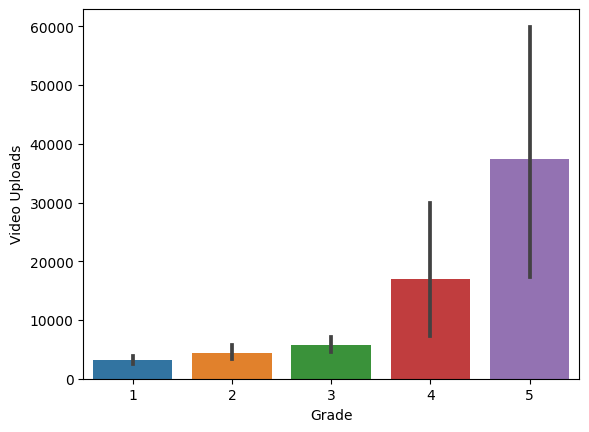

In [35]:
sns.barplot(x='Grade',y='Video Uploads',data=df)

<Axes: xlabel='Grade', ylabel='Avg_views'>

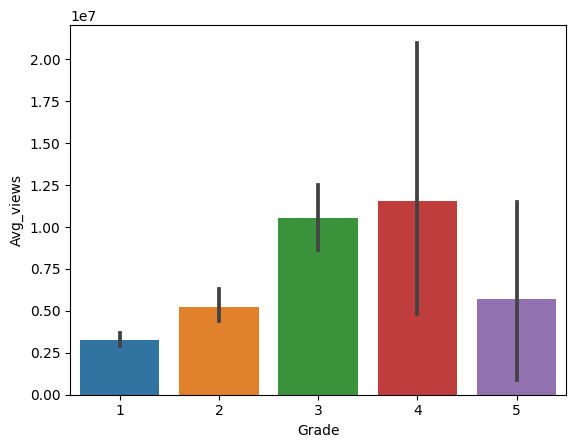

In [36]:
sns.barplot(x='Grade',y='Avg_views',data=df)

<Axes: xlabel='Grade', ylabel='Subscribers'>

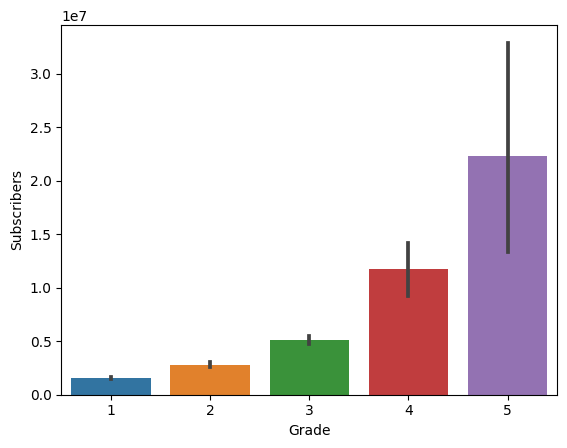

In [37]:
sns.barplot(x='Grade',y='Subscribers',data=df)

In [39]:
df.groupby('Grade').mean(numeric_only=True)

,Rank,Video Uploads,Subscribers,Video views,Avg_views
Grade,,,,,
1,3520.54,3136.16,1535207.95,555183839.09,3280380.88
2,1533.99,4382.58,2798520.38,1102450027.69,5254804.04
3,534.29,5709.86,5107136.29,2497972949.11,10540908.45
4,31.32,16960.30,11726947.47,6168741772.73,11577080.32
5,5.50,37450.70,22281762.50,21199091192.80,5688267.96
